# 1. Подбор числа наблюдений для долей

In [11]:
from scipy import stats
import pandas as pd

In [17]:
def get_n(MDE, alpha, beta):
    za = stats.norm().ppf(1 - alpha)
    zb = stats.norm().ppf(1 - beta)
    return ((za + zb) / MDE)**2


def get_n_with_p(MDE, alpha, beta, p1=0.010, p2=0.015):
    za = stats.norm().ppf(1 - alpha)
    zb = stats.norm().ppf(1 - beta)
    ans = 1/2 *(p1 * (1-p1) + p2 * (1-p2)) * ((za + zb) / MDE)**2
    return ans 

In [21]:
MDE = 0.001

alphas = [0.001, 0.01, 0.02, 0.05, 0.1, 0.2]
betas = [0.001, 0.01, 0.02, 0.05, 0.1, 0.2]

Errors = [ ]
for a in alphas:
    cur_error = []
    for b in betas:
        e = get_n(MDE, a, b)/10**4
        cur_error.append(e)
    Errors.append(cur_error)

df_e = pd.DataFrame(Errors)
df_e.columns = alphas
df_e.index = betas
df_e

,0.001,0.010,0.020,0.050,0.100,0.200
0.001,3819.814282,2933.934085,2646.054276,2242.103879,1911.249422,1545.947226
0.010,2933.934085,2164.757772,1918.524784,1577.044136,1301.693837,1003.602827
0.020,2646.054276,1918.524784,1687.153835,1367.966073,1112.422927,838.316827
0.050,2242.103879,1577.044136,1367.966073,1082.217382,856.384735,618.255723
0.100,1911.249422,1301.693837,1112.422927,856.384735,656.949766,450.786273
0.200,1545.947226,1003.602827,838.316827,618.255723,450.786273,283.330520


In [22]:
MDE = 0.001

alphas = [0.001, 0.01, 0.02, 0.05, 0.1, 0.2]
betas = [0.001, 0.01, 0.02, 0.05, 0.1, 0.2]

Errors = [ ]
for a in alphas:
    cur_error = []
    for b in betas:
        e = get_n_with_p(MDE, a, b)/10**4
        cur_error.append(e)
    Errors.append(cur_error)

df_e = pd.DataFrame(Errors)
df_e.columns = alphas
df_e.index = betas
df_e

,0.001,0.010,0.020,0.050,0.100,0.200
0.001,47.126959,36.197412,32.645695,27.661957,23.580040,19.073124
0.010,36.197412,26.707699,23.669800,19.456782,16.059648,12.381950
0.020,32.645695,23.669800,20.815260,16.877281,13.724518,10.342734
0.050,27.661957,19.456782,16.877281,13.351857,10.565647,7.627730
0.100,23.580040,16.059648,13.724518,10.565647,8.105118,5.561576
0.200,19.073124,12.381950,10.342734,7.627730,5.561576,3.495590


## 2. Про мощности

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


def power_1(n_obs, alpha=0.05, mu1=4, mu2=4.1, sigma=4):
    z_crit = stats.norm().ppf(1 - alpha)
    a = z_crit - (mu2 - mu1)/np.sqrt(2 * sigma/n_obs)
    return 1 - stats.norm().cdf(a)

def power_2(n_obs, alpha=0.05, mu1=4, mu2=4.1, sigma=4):
    z_crit = stats.norm().ppf(1 - alpha)
    a = np.sqrt(2)*z_crit - (mu2 - mu1)/np.sqrt(2 * sigma**2/n_obs)
    return 1 - stats.norm().cdf(a)

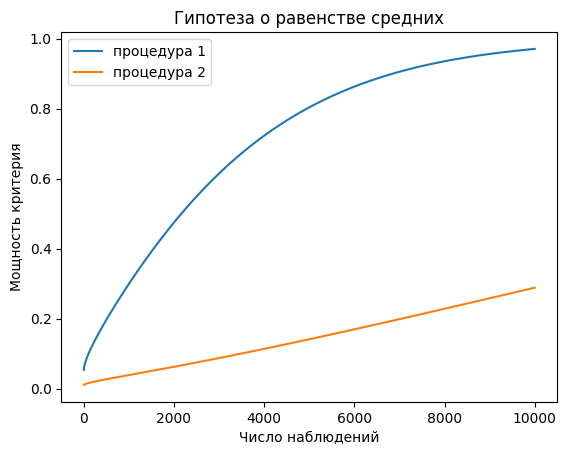

In [32]:
obs = np.arange(1, 10000)

plt.plot(obs, power_1(obs), label='процедура 1')
plt.plot(obs, power_2(obs), label='процедура 2')
plt.title("Гипотеза о равенстве средних")
plt.ylabel("Мощность критерия")
plt.xlabel("Число наблюдений")
plt.legend( );